In [1]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import files
uploaded = files.upload()

Saving 129646813_flux_sim.csv to 129646813_flux_sim.csv


In [12]:
df = pd.read_csv("129646813_flux_sim.csv")
X = df[['pdcsap_flux_arma']].values
X_scaled = StandardScaler().fit_transform(X)  # Standardize for better performance

In [13]:
### 1. Isolation Forest ###
isoforest = IsolationForest(contamination=0.01, random_state=42)
df['iso_outlier'] = isoforest.fit_predict(X_scaled)  # -1 indicates anomaly

In [14]:
### 2. Gaussian Mixture Model (GMM) ###
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
df['gmm_cluster'] = gmm.fit_predict(X_scaled)  # Anomalies can be lowest probability cluster

In [15]:
### 3. DBSCAN ###
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(X_scaled)

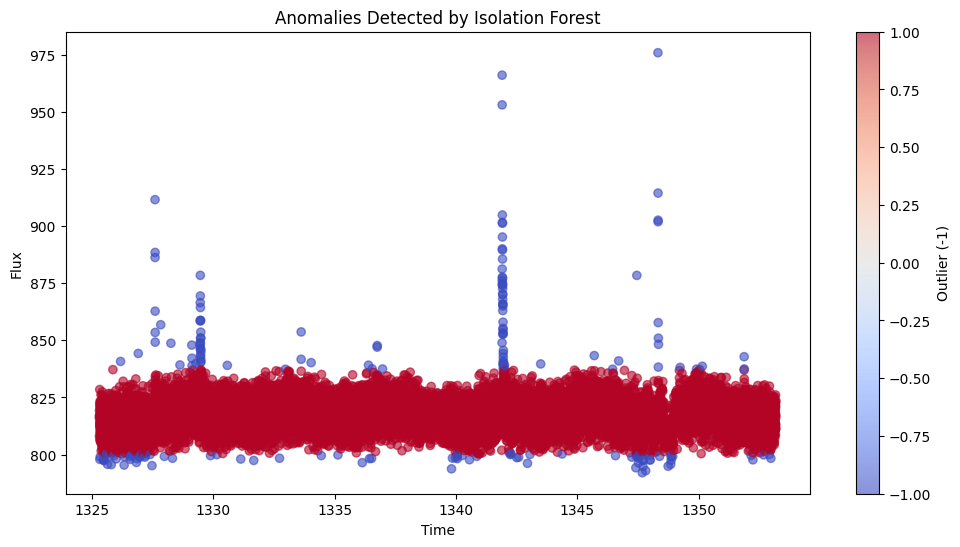

In [7]:
# Plot Isolation Forest
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['pdcsap_flux_arma'], c=df['iso_outlier'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Anomalies Detected by Isolation Forest')
plt.colorbar(label="Outlier (-1)")
plt.show()

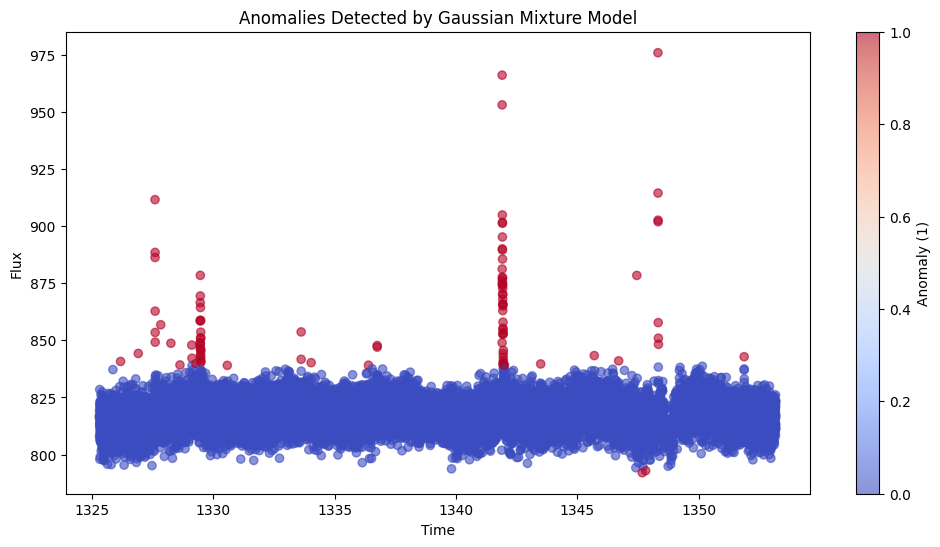

In [8]:
## Plot GMM
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['pdcsap_flux_arma'], c=df['gmm_cluster'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Anomalies Detected by Gaussian Mixture Model')
plt.colorbar(label="Anomaly (1)")
plt.show()

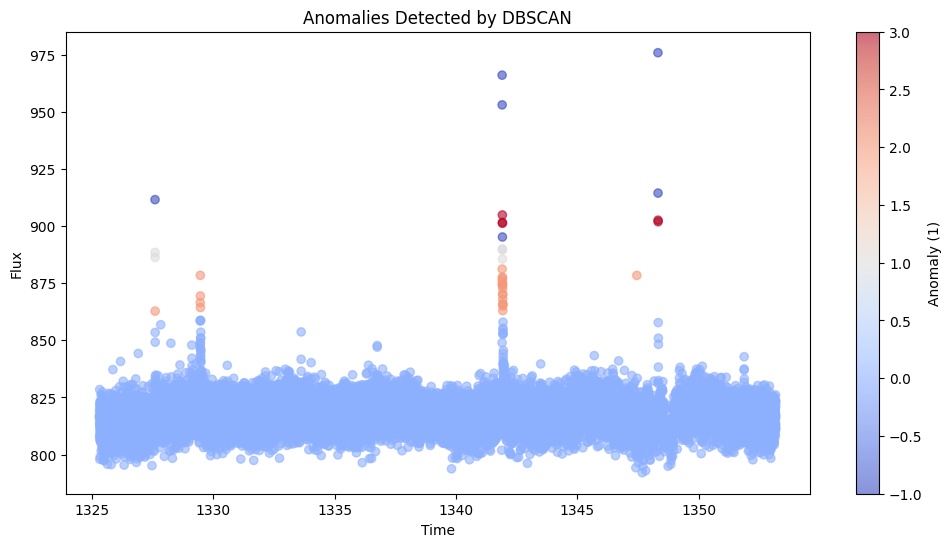

In [9]:
## Plot DBSCAN
plt.figure(figsize=(12, 6))
plt.scatter(df['time'], df['pdcsap_flux_arma'], c=df['dbscan_cluster'], cmap='coolwarm', alpha=0.6)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Anomalies Detected by DBSCAN')
plt.colorbar(label="Anomaly (1)")
plt.show()

In [16]:
### Save models ###
joblib.dump(isoforest, "isolation_forest_impute.pkl")
joblib.dump(gmm, "gmm_impute.pkl")
joblib.dump(dbscan, "dbscan_impute.pkl")

files.download("isolation_forest_impute.pkl")
files.download("gmm_impute.pkl")
files.download("dbscan_impute.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>